In [94]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture



import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

data_url="/Users/monalisa/Downloads/jewelry_customers.csv"
data=pd.read_csv(data_url)
print(data.head())



   Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [96]:
data.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [97]:
# Check missing value
data.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [98]:
# target(PURCHASE) distribution
#l = data["Income"].value_counts()
#l 

In [99]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition
X1, Y1 = make_blobs(n_features=4, 
         n_samples=20,
         centers=4, random_state=4,
         cluster_std=2)
print(X1.shape)



(20, 4)


In [100]:
#PC1=Age,PC2=Income,PC3=SpendingScore and PC4=Savings
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-4.409551,-3.160127,-4.509424,-1.065725,2
1,14.146063,-0.872741,3.008719,2.515053,3
2,-11.595309,1.509135,1.382673,1.672560,1
3,17.044320,-3.644227,2.451111,0.028253,3
4,3.876021,8.312817,-4.916024,0.060336,0


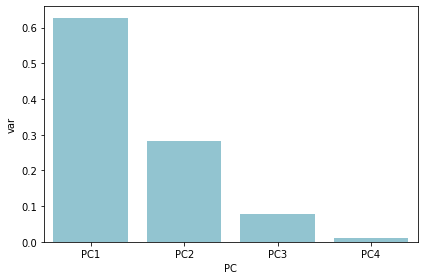

In [101]:
#The graph below shows that the Spending score and Savings have a very less contribution
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [102]:
#Corrolation of numeric features
data['Age'] =data['Age'].astype('category').cat.codes


corr_matrix = data.corr()

corr_matrix["Age"].sort_values(ascending=False)

Age              1.000000
Savings          0.404934
SpendingScore   -0.321971
Income          -0.827002
Name: Age, dtype: float64

<Figure size 720x720 with 0 Axes>

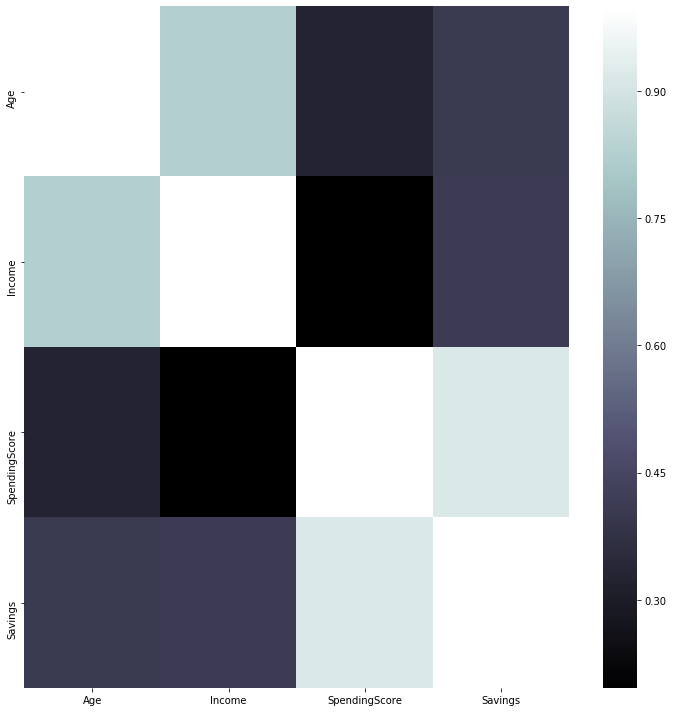

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (10,10))
sns.heatmap(abs(corr_matrix), 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            cmap= "bone")
plt.show()

In [141]:
X=data.copy()

In [142]:
scaler = StandardScaler()
features = ['Age', 'Income','Savings']
X[features] = scaler.fit_transform(X[features])

In [143]:

#k_means = KMeans(init='k-means++',n_clusters=5,n_init=10,max_iter=300,random_state=42)
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)
#k_means.fit(data)
k_means.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 4, 0, 0, 0, 2, 4, 2, 1, 1, 4, 0, 4,
       2, 1, 4, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 4, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 4, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 4, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 4, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 0, 1, 2,
       1, 4, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 4, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 4, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 4, 0, 1,
       1, 0, 4, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

In [151]:
#cluster_new=data.copy()
#cluster_new['cluster_pred']=k_means.fit_predict(data)

#plt.scatter(cluster_new['Income'],cluster_new['Age'],c=cluster_new['cluster_pred'],cmap='rainbow')
#plt.xlabel('Income')
#plt.ylabel('Age')
#plt.show()

In [144]:

# Let's look at the centers
k_means.cluster_centers_

array([[-1.05018457,  0.82744102,  0.30992613,  0.6270464 ],
       [ 1.15154089, -1.32510593,  0.32880046,  0.97016358],
       [ 0.09192254, -0.08524639,  0.77151837, -1.00569483],
       [-1.5528621 ,  1.46050665,  0.89689164, -1.57249636],
       [ 1.05032044,  1.23565419,  0.0683781 ,  0.59588052]])

In [126]:

# WCSS == Inertia
k_means.inertia_

63.09236952458268

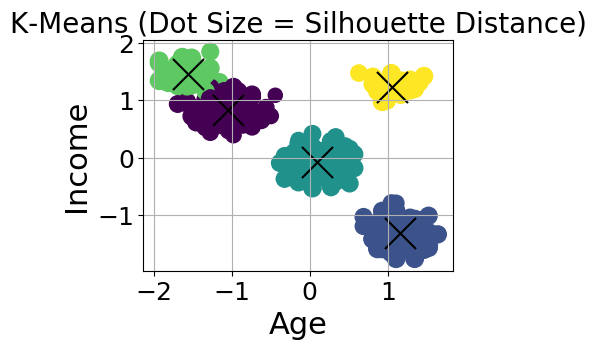

In [149]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(4, 3));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);



In [127]:
silhouette_score(X, k_means.labels_)

0.7955064331064984

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a400a90>,
                     colors=None, is_fitted='auto', model=None)

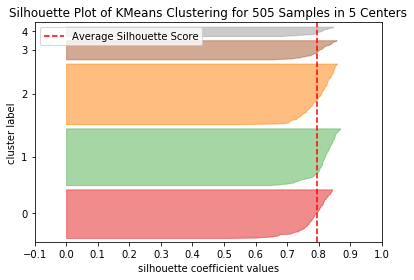

In [128]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()

/Users/monalisa/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


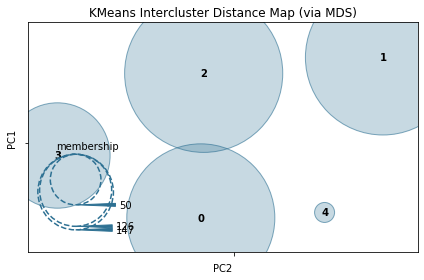

<Figure size 432x288 with 0 Axes>

In [129]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(k_means)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.savefig('/Users/monalisa/Downloads/mall-kmeans-5-tsne.png', transparent=False);

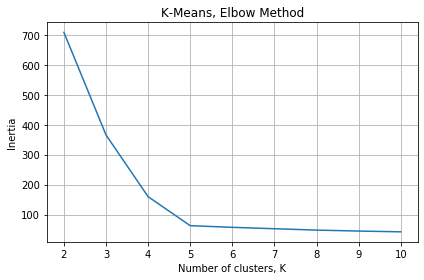

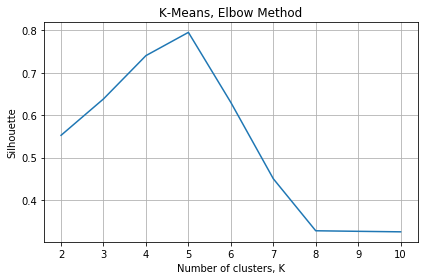

In [130]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('/Users/monalisa/Downloads/mall-kmeans-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('/Users/monalisa/Downloads/mall-kmeans-elbow-silhouette.png');

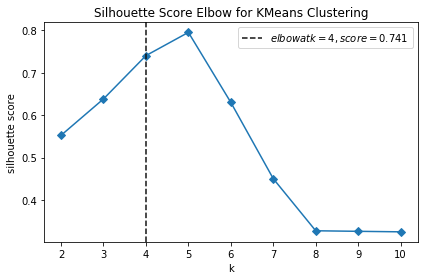

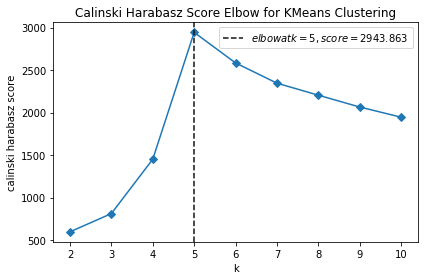

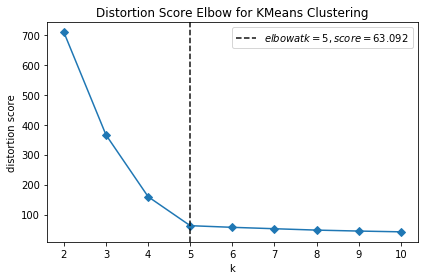

In [131]:
model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(X).poof();
KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False).fit(X).poof();
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(X).poof();

In [132]:
k_means.cluster_centers_

array([[-1.05018457,  0.82744102,  0.30992613,  0.6270464 ],
       [ 1.15154089, -1.32510593,  0.32880046,  0.97016358],
       [ 0.09192254, -0.08524639,  0.77151837, -1.00569483],
       [-1.5528621 ,  1.46050665,  0.89689164, -1.57249636],
       [ 1.05032044,  1.23565419,  0.0683781 ,  0.59588052]])

In [133]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)


Cluster 0:


,Age,Income,SpendingScore,Savings
454,-1.154476,0.901590,0.374242,0.069791
457,-0.916634,0.962051,0.286769,0.619312
460,-1.332858,0.697459,0.259598,0.739818
461,-1.035555,1.143099,0.320930,0.655710
463,-1.332858,0.535322,0.303596,0.705873
468,-1.095016,1.155169,0.311356,0.495131
471,-1.154476,0.714618,0.304323,1.022407
476,-1.035555,0.868912,0.258396,0.519625
477,-1.035555,0.878451,0.342435,0.613434
482,-1.095016,0.915078,0.287371,0.977675



Cluster 1:


,Age,Income,SpendingScore,Savings
485,1.283406,-1.466499,0.356307,0.821470
486,1.342866,-1.316793,0.303693,1.132151
488,1.402327,-1.579355,0.327862,0.703620
489,1.640169,-1.341656,0.283923,0.620046
490,0.926643,-1.086019,0.353621,0.950770
493,1.402327,-1.098006,0.336968,1.109584
494,1.105024,-1.268291,0.342152,1.270098
497,1.342866,-1.244736,0.303698,0.734084
501,1.461787,-1.545704,0.203140,1.235201
502,1.283406,-1.118447,0.355149,0.855313



Cluster 2:


,Age,Income,SpendingScore,Savings
467,0.153655,-0.096957,0.762325,-0.998383
469,0.272577,-0.137199,0.766509,-0.930429
470,-0.024726,-0.134529,0.764028,-0.849062
472,0.213116,-0.051124,0.796619,-1.450915
473,0.094195,-0.334767,0.751900,-0.873509
474,0.213116,-0.216432,0.819170,-1.194480
478,0.391498,-0.141370,0.696994,-0.989273
479,0.034734,-0.169793,0.879906,-1.086232
480,0.391498,-0.119150,0.787890,-0.574015
491,-0.024726,-0.143067,0.904520,-0.890089



Cluster 3:


,Age,Income,SpendingScore,Savings
406,-1.511240,1.263825,0.877673,-1.268526
412,-1.749082,1.507698,0.951792,-1.478797
415,-1.451779,1.394675,0.926818,-1.167596
442,-1.927464,1.689275,0.935876,-1.564668
445,-1.570700,1.250143,0.907485,-1.420640
451,-1.392319,1.311493,0.910107,-1.548476
456,-1.927464,1.343670,0.942013,-1.630882
458,-1.332858,1.451326,0.881425,-1.288677
466,-1.868003,1.340611,0.806553,-1.505162
487,-1.451779,1.320782,0.984526,-1.515115



Cluster 4:


,Age,Income,SpendingScore,Savings
283,1.283406,1.353181,0.030751,0.588746
288,0.867182,1.163428,0.155694,0.652110
311,0.986103,1.186289,0.123196,0.605440
312,1.164485,1.091677,0.032208,1.207573
343,0.926643,1.104748,0.068778,0.512529
351,1.342866,1.203671,0.019212,0.441907
353,0.629340,1.476272,0.040824,0.534138
368,0.926643,0.975288,0.079049,0.622034
383,1.105024,1.169463,0.128280,0.432373
414,1.164485,1.338748,0.029027,0.332122


In [134]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,477
Age,-1.035555
Income,0.878451
SpendingScore,0.342435
Savings,0.613434



Cluster 1:


,178
Age,1.164485
Income,-1.305113
SpendingScore,0.397740
Savings,0.983630



Cluster 2:


,467
Age,0.153655
Income,-0.096957
SpendingScore,0.762325
Savings,-0.998383



Cluster 3:


,217
Age,-1.630161
Income,1.513566
SpendingScore,0.872736
Savings,-1.569555



Cluster 4:


,311
Age,0.986103
Income,1.186289
SpendingScore,0.123196
Savings,0.605440


Text(0.5, 1.0, 'Snake Plot, K-Means, K=5')

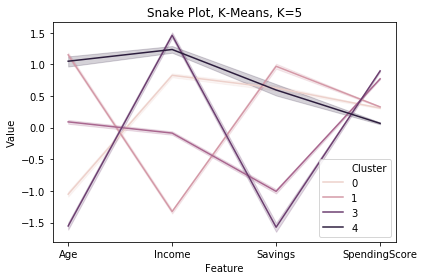

In [138]:
dat = X.copy()

dat['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat.reset_index(),
id_vars=['Cluster'],
value_vars=['Age','Income','Savings','SpendingScore'],
var_name='Feature',
value_name='Value')

plt.title('Snake Plot, K-Means, K=5')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt)


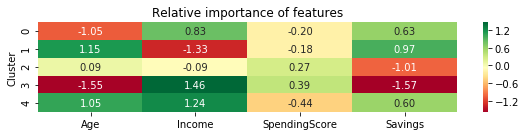

In [137]:
cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
